# Wrangle and Analyze Data
> Data Source: WeRateDogs Twitter data

**Instructions proposed by Udacity Data Analytics Nanodegreeprogram for this project:**

+ You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
+ Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
+ Cleaning includes merging individual pieces of data according to the rules of tidy data.
+ The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
+ You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Gathering Data
 + The WeRateDogs Twitter archive (on-hand file)
 + The tweet image predictions (download using the `requests`library)
 + Each tweet's retweet count and favorite ("like") count (query Twitter API using `Tweepy` library)

In [7]:
# import packages 
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Dataset 1: The WeRateDogs Twitter archive *(on-hand file provided by udacity.com)*

In [14]:
# Load The WeRateDogs Twitter archive 
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [15]:
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


##### Dataset 2: The tweet image predictions

In [16]:
# Download tweet image predictions from Udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
reponse =  requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(reponse.content)

##### Dataset 3: Each tweet's retweet count and favorite ("like") count

In [17]:
# Twitter API authentation
consumer_key = 'XXXXXXX'
consumer_secret = 'XXXXXXX'
access_token = 'XXXXX'
access_secret = 'XXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [24]:
# Twitter API query
id_list = archive.tweet_id.tolist()
for tweet_id in id_list:
    try:
        start = time.time()
        status = api.get_status(tweet_id, tweet_mode='extended')
        json_str = json.dumps(status._json)
        with open ("tweet_json.txt","a") as file:
            file.write(json_str)
            file.write('\n')
        end = time.time()
        print(tweet_id,"succeeded in",end-start)
    except:
        print(tweet_id,"error")

892420643555336193 succeeded in 0.3913557529449463
892177421306343426 succeeded in 0.22720646858215332
891815181378084864 succeeded in 0.6295721530914307
891689557279858688 succeeded in 0.2652411460876465
891327558926688256 succeeded in 0.3493168354034424
891087950875897856 succeeded in 0.21619629859924316
890971913173991426 succeeded in 0.4754316806793213
890729181411237888 succeeded in 0.33530497550964355
890609185150312448 succeeded in 0.9168329238891602
890240255349198849 succeeded in 5.0876219272613525
890006608113172480 succeeded in 0.7937214374542236
889880896479866881 succeeded in 0.6265690326690674
889665388333682689 succeeded in 0.5284802913665771
889638837579907072 succeeded in 0.19117379188537598
889531135344209921 succeeded in 0.23221063613891602
889278841981685760 succeeded in 0.6676061153411865
888917238123831296 succeeded in 0.6105544567108154
888804989199671297 succeeded in 1.5033652782440186
888554962724278272 succeeded in 7.595901250839233
888202515573088257 error
88

860177593139703809 succeeded in 0.2692446708679199
859924526012018688 succeeded in 0.24622392654418945
859851578198683649 succeeded in 0.21919941902160645
859607811541651456 succeeded in 4.127749919891357
859196978902773760 succeeded in 4.283891916275024
859074603037188101 succeeded in 0.33029985427856445
858860390427611136 succeeded in 0.3583254814147949
858843525470990336 succeeded in 0.29126501083374023
858471635011153920 succeeded in 0.2572331428527832
858107933456039936 succeeded in 0.24121928215026855
857989990357356544 succeeded in 1.7686069011688232
857746408056729600 succeeded in 0.7777063846588135
857393404942143489 succeeded in 2.907641649246216
857263160327368704 succeeded in 3.344038248062134
857214891891077121 succeeded in 0.6205639839172363
857062103051644929 succeeded in 0.24622344970703125
857029823797047296 succeeded in 0.2452225685119629
856602993587888130 error
856543823941562368 succeeded in 6.63002347946167
856526610513747968 succeeded in 0.25823450088500977
85633

833479644947025920 succeeded in 0.2502269744873047
833124694597443584 succeeded in 0.20118308067321777
832998151111966721 succeeded in 0.23821640014648438
832769181346996225 succeeded in 0.2422196865081787
832757312314028032 succeeded in 0.7406728267669678
832682457690300417 succeeded in 0.23721528053283691
832645525019123713 succeeded in 0.23921751976013184
832636094638288896 succeeded in 9.459594488143921
832397543355072512 succeeded in 0.5825290679931641
832369877331693569 succeeded in 0.23621439933776855
832273440279240704 succeeded in 0.3863508701324463
832215909146226688 succeeded in 0.58553147315979
832215726631055365 succeeded in 1.4212908744812012
832088576586297345 succeeded in 4.6502251625061035
832040443403784192 succeeded in 0.25122833251953125
832032802820481025 succeeded in 0.27124667167663574
831939777352105988 succeeded in 0.22920846939086914
831926988323639298 succeeded in 0.38534975051879883
831911600680497154 succeeded in 0.2352135181427002
831670449226514432 succee

813812741911748608 succeeded in 6.903271675109863
813800681631023104 succeeded in 0.2922658920288086
813217897535406080 succeeded in 0.22720646858215332
813202720496779264 succeeded in 0.5364871025085449
813187593374461952 succeeded in 0.23421263694763184
813172488309972993 succeeded in 0.21219277381896973
813157409116065792 succeeded in 0.22320246696472168
813142292504645637 succeeded in 0.2302088737487793
813130366689148928 succeeded in 0.21919894218444824
813127251579564032 succeeded in 0.25323009490966797
813112105746448384 succeeded in 0.23221111297607422
813096984823349248 succeeded in 0.22920823097229004
813081950185472002 succeeded in 1.0059137344360352
813066809284972545 succeeded in 4.108732461929321
813051746834595840 succeeded in 3.28798770904541
812781120811126785 succeeded in 0.21919918060302734
812747805718642688 error
812709060537683968 succeeded in 0.21719765663146973
812503143955202048 succeeded in 0.2722470760345459
812466873996607488 succeeded in 0.2252049446105957


792394556390137856 succeeded in 0.2602353096008301
792050063153438720 succeeded in 0.2302088737487793
791821351946420224 succeeded in 0.25823497772216797
791784077045166082 succeeded in 0.4604184627532959
791780927877898241 succeeded in 0.245222806930542
791774931465953280 succeeded in 0.2752504348754883
791672322847637504 succeeded in 0.21319341659545898
791406955684368384 succeeded in 49.48497152328491
791312159183634433 succeeded in 5.667656660079956
791026214425268224 succeeded in 3.1618728637695312
790987426131050500 succeeded in 0.3142850399017334
790946055508652032 succeeded in 0.3533205986022949
790723298204217344 succeeded in 0.24322128295898438
790698755171364864 succeeded in 0.24822568893432617
790581949425475584 succeeded in 0.5845310688018799
790337589677002753 succeeded in 0.23621392250061035
790277117346975746 succeeded in 1.0299360752105713
790227638568808452 succeeded in 6.6295294761657715
789986466051088384 succeeded in 0.6836211681365967
789960241177853952 succeeded 

771014301343748096 succeeded in 0.5144674777984619
771004394259247104 error
770787852854652928 succeeded in 0.21919870376586914
770772759874076672 succeeded in 0.25823521614074707
770743923962707968 error
770655142660169732 succeeded in 0.28125572204589844
770414278348247044 succeeded in 0.2081892490386963
770293558247038976 succeeded in 0.2572336196899414
770093767776997377 succeeded in 0.359325647354126
770069151037685760 succeeded in 0.2352132797241211
769940425801170949 succeeded in 0.3933570384979248
769695466921623552 succeeded in 0.5314829349517822
769335591808995329 succeeded in 8.976155042648315
769212283578875904 succeeded in 9.35249638557434
768970937022709760 succeeded in 0.30027270317077637
768909767477751808 succeeded in 0.269244909286499
768855141948723200 succeeded in 0.388352632522583
768609597686943744 succeeded in 15.538623571395874
768596291618299904 succeeded in 1.318197250366211
768554158521745409 succeeded in 0.272247314453125
768473857036525572 succeeded in 0.27

750011400160841729 succeeded in 0.703639030456543
749996283729883136 succeeded in 5.087622404098511
749981277374128128 succeeded in 2.640399217605591
749774190421639168 succeeded in 4.779342174530029
749417653287129088 succeeded in 3.932572841644287
749403093750648834 succeeded in 0.2602360248565674
749395845976588288 succeeded in 0.5154685974121094
749317047558017024 succeeded in 0.2652406692504883
749075273010798592 succeeded in 0.2502272129058838
749064354620928000 succeeded in 0.6095538139343262
749036806121881602 succeeded in 0.3433115482330322
748977405889503236 succeeded in 0.307279109954834
748932637671223296 succeeded in 0.23421311378479004
748705597323898880 succeeded in 0.38535046577453613
748699167502000129 succeeded in 2.1039111614227295
748692773788876800 succeeded in 1.9427647590637207
748575535303884801 succeeded in 2.9847114086151123
748568946752774144 succeeded in 0.21319341659545898
748346686624440324 succeeded in 0.25423097610473633
748337862848962560 succeeded in 0

728035342121635841 succeeded in 0.22320222854614258
728015554473250816 succeeded in 0.22220206260681152
727685679342333952 succeeded in 0.25322985649108887
727644517743104000 succeeded in 0.5124657154083252
727524757080539137 succeeded in 0.2302088737487793
727314416056803329 succeeded in 2.5638363361358643
727286334147182592 succeeded in 4.428023099899292
727175381690781696 succeeded in 0.4944491386413574
727155742655025152 succeeded in 0.2572338581085205
726935089318363137 succeeded in 0.2502272129058838
726887082820554753 succeeded in 0.25322985649108887
726828223124897792 succeeded in 0.48143720626831055
726224900189511680 succeeded in 0.34831690788269043
725842289046749185 succeeded in 0.2572336196899414
725786712245440512 succeeded in 0.5404908657073975
725729321944506368 succeeded in 18.69322180747986
725458796924002305 succeeded in 0.35732483863830566
724983749226668032 succeeded in 0.23120999336242676
724771698126512129 succeeded in 0.34731554985046387
724405726123311104 succe

707738799544082433 succeeded in 0.24322056770324707
707693576495472641 succeeded in 0.2672426700592041
707629649552134146 succeeded in 1.3742482662200928
707610948723478529 succeeded in 17.832723379135132
707420581654872064 succeeded in 0.26123738288879395
707411934438625280 succeeded in 0.23621439933776855
707387676719185920 succeeded in 0.2252044677734375
707377100785885184 succeeded in 0.36533164978027344
707315916783140866 succeeded in 5.061611652374268
707297311098011648 succeeded in 1.5604181289672852
707059547140169728 succeeded in 3.071791172027588
707038192327901184 succeeded in 0.250227689743042
707021089608753152 succeeded in 0.25923609733581543
707014260413456384 succeeded in 4.552148818969727
706904523814649856 succeeded in 7.606910705566406
706901761596989440 succeeded in 4.242360591888428
706681918348251136 succeeded in 0.2622382640838623
706644897839910912 succeeded in 0.2522292137145996
706593038911545345 succeeded in 0.6515915393829346
706538006853918722 succeeded in 

695051054296211456 succeeded in 0.2522287368774414
694925794720792577 succeeded in 0.22920799255371094
694905863685980160 succeeded in 0.5214738845825195
694669722378485760 succeeded in 0.2352132797241211
694356675654983680 succeeded in 0.22120070457458496
694352839993344000 succeeded in 0.24422216415405273
694342028726001664 succeeded in 9.658281326293945
694329668942569472 succeeded in 0.25323009490966797
694206574471057408 succeeded in 0.6565966606140137
694183373896572928 succeeded in 68.45876884460449
694001791655137281 succeeded in 0.25423121452331543
693993230313091072 succeeded in 0.23120999336242676
693942351086120961 succeeded in 0.24121928215026855
693647888581312512 succeeded in 0.2722475528717041
693644216740769793 succeeded in 0.2472240924835205
693642232151285760 succeeded in 9.093276977539062
693629975228977152 succeeded in 0.2642402648925781
693622659251335168 succeeded in 0.27124619483947754
693590843962331137 succeeded in 0.2202000617980957
693582294167244802 succeed

684940049151070208 succeeded in 0.6145589351654053
684926975086034944 succeeded in 0.21819829940795898
684914660081053696 succeeded in 0.23721551895141602
684902183876321280 succeeded in 0.2707538604736328
684880619965411328 succeeded in 0.6255683898925781
684830982659280897 succeeded in 0.25322985649108887
684800227459624960 succeeded in 1.4077863693237305
684594889858887680 succeeded in 5.859830141067505
684588130326986752 succeeded in 0.25623273849487305
684567543613382656 succeeded in 0.23221111297607422
684538444857667585 succeeded in 0.24922585487365723
684481074559381504 succeeded in 0.25423097610473633
684460069371654144 succeeded in 0.24422216415405273
684241637099323392 succeeded in 0.26123738288879395
684225744407494656 succeeded in 0.6145584583282471
684222868335505415 succeeded in 0.5484983921051025
684200372118904832 succeeded in 1.3892617225646973
684195085588783105 succeeded in 4.014991521835327
684188786104872960 succeeded in 1.6545028686523438
684177701129875456 succe

677698403548192770 succeeded in 3.8560099601745605
677687604918272002 succeeded in 0.7606911659240723
677673981332312066 succeeded in 1.660508632659912
677662372920729601 succeeded in 0.2902638912200928
677644091929329666 succeeded in 0.27324795722961426
677573743309385728 succeeded in 0.36232924461364746
677565715327688705 succeeded in 0.31028151512145996
677557565589463040 succeeded in 0.2542307376861572
677547928504967168 succeeded in 0.26824355125427246
677530072887205888 succeeded in 0.294266939163208
677335745548390400 succeeded in 0.25923609733581543
677334615166730240 succeeded in 6.577481985092163
677331501395156992 succeeded in 0.5444943904876709
677328882937298944 succeeded in 0.2081892490386963
677314812125323265 succeeded in 9.57020115852356
677301033169788928 succeeded in 0.2502274513244629
677269281705472000 succeeded in 0.46642398834228516
677228873407442944 succeeded in 0.34231114387512207
677187300187611136 succeeded in 0.27324795722961426
676975532580409345 succeeded

673715861853720576 succeeded in 0.2652409076690674
673711475735838725 succeeded in 0.9558684825897217
673709992831262724 succeeded in 0.23921751976013184
673708611235921920 succeeded in 0.2502274513244629
673707060090052608 succeeded in 0.21919941902160645
673705679337693185 succeeded in 0.7401788234710693
673700254269775872 succeeded in 1.377251386642456
673697980713705472 succeeded in 1.9928107261657715
673689733134946305 succeeded in 0.5705175399780273
673688752737402881 succeeded in 1.0169241428375244
673686845050527744 succeeded in 1.8636934757232666
673680198160809984 succeeded in 0.25323009490966797
673662677122719744 succeeded in 0.21619629859924316
673656262056419329 succeeded in 0.22120118141174316
673636718965334016 succeeded in 0.2672426700592041
673612854080196609 succeeded in 0.18116426467895508
673583129559498752 succeeded in 0.2522289752960205
673580926094458881 succeeded in 0.47443103790283203
673576835670777856 succeeded in 0.2302086353302002
673363615379013632 succee

670691627984359425 succeeded in 0.20418548583984375
670679630144274432 succeeded in 0.2151954174041748
670676092097810432 succeeded in 0.24822545051574707
670668383499735048 succeeded in 0.24322080612182617
670474236058800128 succeeded in 0.25423097610473633
670468609693655041 succeeded in 0.38535046577453613
670465786746662913 succeeded in 4.471955299377441
670452855871037440 succeeded in 1.053957223892212
670449342516494336 succeeded in 2.811554193496704
670444955656130560 succeeded in 0.5505001544952393
670442337873600512 succeeded in 0.21819806098937988
670435821946826752 succeeded in 0.19217491149902344
670434127938719744 succeeded in 0.25923585891723633
670433248821026816 succeeded in 0.3343038558959961
670428280563085312 succeeded in 1.4192893505096436
670427002554466305 succeeded in 3.8129703998565674
670421925039075328 succeeded in 1.2361228466033936
670420569653809152 succeeded in 0.2552316188812256
670417414769758208 succeeded in 0.6025476455688477
670411370698022913 succeed

667546741521195010 succeeded in 0.22174644470214844
667544320556335104 succeeded in 0.2592356204986572
667538891197542400 succeeded in 1.050955057144165
667534815156183040 succeeded in 6.1485865116119385
667530908589760512 succeeded in 0.35532259941101074
667524857454854144 succeeded in 0.24622392654418945
667517642048163840 succeeded in 0.2402181625366211
667509364010450944 succeeded in 0.5795271396636963
667502640335572993 succeeded in 0.5715188980102539
667495797102141441 succeeded in 0.2792544364929199
667491009379606528 succeeded in 0.21419358253479004
667470559035432960 succeeded in 0.24422168731689453
667455448082227200 succeeded in 0.3578321933746338
667453023279554560 succeeded in 1.7726101875305176
667443425659232256 succeeded in 1.0179245471954346
667437278097252352 succeeded in 4.263899564743042
667435689202614272 succeeded in 0.23621463775634766
667405339315146752 succeeded in 0.20118260383605957
667393430834667520 succeeded in 0.22620534896850586
667369227918143488 succee

In [18]:
# Load data from json_tweet.txt
data = []
with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))
        
# Count number of line in this file        
count = len(open('tweet_json.txt').readlines())

# Retrieve the id, favorite_count, and retweet_count and store the data into a new dataframe
df_list = []
for index in range(count-1):
    tweet_id = data[index]['id']
    fav_count = data[index]['favorite_count']
    ret_count = data[index]['retweet_count']
    df_list.append({'tweet_id':tweet_id, 
                'favorite_count':fav_count,
                'retweet_count': ret_count})
    tweet_count = pd.DataFrame(df_list,columns = ['tweet_id','favorite_count','retweet_count'])

-----

## Assessing Data
#### Quality
##### `archive` table
+ Useless retweeted info (we only want the original ratings according to instructions)
+ inconsistency with rating numerator and denominator columns
+ Rating denominator equals to "0" for *tweet_id:835246439529840640*
+ Redundant information in the "text" column (repeated rating and short link)
+ Ambiguous information in the "source" column
+ Missing values (2297 instead of 2356) and repeated info in "expanded-url" column (e.g.url repeated three times for *tweet_id: 835152434251116546*)

##### `tweet_count` table
+ Missing values (2325 instead of 2356)

*(Before accessing the `image` table, I first cleaned the useless retweeted tweet to get the accurate number of rating that we need for this data wrangling)*

##### `image` table
+ Missing values (2075 instead of 2097)
+ Unnecessary columns except "tweet_id" and "jpg.url"

#### Tidiness
+ One variable (dog_stage) in four columns in `archive` table
+ Three sub-tables should be merged into one table as tweet_id duplicated in all datasets

*Note: concerning the missing values in `tweet_count` and `image` tables, I chose the minimum number (2075, same as the total number in `image`table) since we target to the **original ratings that have pictures**.*

##### `archive` table

In [19]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [22]:
archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [23]:
# Check the info about dogs rated "0"
archive.expanded_urls[315]

'https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1'

In [24]:
archive.expanded_urls[1016]

'https://twitter.com/dog_rates/status/746906459439529985/photo/1'

In [53]:
# Check duplicated id
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
# Check the information about "source" column
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
# Look at 
archive.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [27]:
archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

##### `tweet_count` table

In [28]:
tweet_count

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36243,7716
1,892177421306343426,31266,5701
2,891815181378084864,23537,3780
3,891689557279858688,39541,7878
4,891327558926688256,37764,8486
...,...,...,...
2320,666050758794694657,125,51
2321,666049248165822465,96,39
2322,666044226329800704,272,132
2323,666033412701032449,112,41


In [29]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   favorite_count  2325 non-null   int64
 2   retweet_count   2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [30]:
tweet_count.describe()

,tweet_id,favorite_count,retweet_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.418203e+17,7570.114839,2707.324301
std,6.818649e+16,11758.106313,4580.645045
min,6.660293e+17,0.000000,1.000000
25%,6.782555e+17,1318.000000,548.000000
50%,7.182346e+17,3291.000000,1269.000000
75%,7.986654e+17,9268.000000,3139.000000
max,8.924206e+17,156364.000000,77892.000000


In [31]:
# Before acessing the image table, I first cleaned the useless retweeted tweet to get the accurate number of rating 
# that we need for this data wrangling.
archive = archive[archive.retweeted_status_id.isnull()]
archive = archive[archive.in_reply_to_status_id.isnull()]
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

##### `image` table

In [32]:
image = pd.read_csv('image-predictions.tsv',sep='\t')
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [33]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [83]:
image.iloc[2070]

tweet_id                                 891327558926688256
jpg_url     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
img_num                                                   2
p1                                                   basset
p1_conf                                            0.555712
p1_dog                                                 True
p2                                         English_springer
p2_conf                                             0.22577
p2_dog                                                 True
p3                              German_short-haired_pointer
p3_conf                                            0.175219
p3_dog                                                 True
Name: 2070, dtype: object

In [85]:
image.query('img_num >= 2')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
410,673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True


## Cleaning Data

*Note1: concerning the missing values in `tweet_count` and `image` tables, I chose the minimum number (2075, same as the total number in `image`table) since we target to the **original ratings that have pictures**.* <br>
*Note2: the tweet (id:835246439529840640) was a retweeted tweet and was cleaned in the previous section.*

#### Define
##### `archive` table
1. Drop the retweeted rows and the "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id", "retweeted_status_timestamp" columns
2. Add a new column "rating" with the calculated rating (formula: rating_numerator/rating_denominator)
3. Move the short link into a new created column "short_url" and drop the long and redudant "expanded_urls" column (which also has some missing values - 2094 instead of 2097)
4. Delete the short link and keep the original text as that in tweet in the "text" column
5. Only keep the essential information in the middle in the "source" column(iPhone, Vine, Web, and TweetDeck)
6. Convert the datatype of "timestamp" column to datetime
7. Create a new column "dog_stage" containing the information in the "doggo","floofer","pupper", and "puppo" columns and drop the intermediate columns.<br>
(*Note: some tweets contain two dog stages. Some of them mention two ages for one dog; others have two dogs in one image. Use "/" to label two dog stage)*
8. Arrange the order of columns

#####  Others
+ Only keep "tweet_id" and "jpg.url" columns in the `image` table (as other information will be used for simulating the confusion matrix)
+ Merge the`archive`, `tweet_count`, and `image` tables into one final table


In [35]:
# Make a copy of the archive table
a_clean = archive.copy()

1. Drop the retweeted rows and the "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id", "retweeted_status_timestamp" columns

In [36]:
# Drop the retweeted rows and the "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id", 
#"retweeted_status_timestamp" columns
a_clean = a_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

# Test
a_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Add a new column "rating" with the calculated rating (formula: rating_numerator/rating_denominator)

In [37]:
#Add a new column "rating" with the calculated rating (formula: rating_numerator/rating_denominator)
a_clean['rating'] = a_clean['rating_numerator']/a_clean['rating_denominator']

# Test
a_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3


3. Move the short link into a new created column "short_url" and drop the long and redudant "expanded_urls" column (which also has some missing values - 2094 instead of 2097)<br>
4. Delete the short link and keep the original text as that in tweet in the "text" column

In [38]:
# Display the original "text" column
a_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [39]:
# Count the lengh of the short link as it keeps the same length in the dataset
len(" https://t.co/MgUWQ76dJU")

24

In [40]:
# Move the short link into a new created column and keep the original text as that in tweet in the "text" column
a_clean['short_url'] = a_clean['text'].str[-23:]
a_clean['text'] = a_clean['text'].str[:-24]

In [41]:
# Test
a_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

In [42]:
# Test
a_clean.short_url[0]

'https://t.co/MgUWQ76dJU'

In [43]:
# Drop the long and redundant "expanded_urls" column
a_clean = a_clean.drop(['expanded_urls'], axis=1)

In [44]:
# Test
a_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,short_url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,1.3,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,1.3,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,1.2,https://t.co/wUnZnhtVJB


5. Only keep the essential information in the middle in the "source" column(iPhone, Vine, Web, and TweetDeck)

In [45]:
a_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [46]:
# Only keep the essential information in the middle in the "source" column(iPhone, Vine, Web, and TweetDeck)
a_clean['source'] = a_clean['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':"iPhone",
                                               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': "Vine",
                                               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': "Web",
                                               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':"TweetDeck"})
# Test
a_clean.source.value_counts()

iPhone       1964
Vine           91
Web            31
TweetDeck      11
Name: source, dtype: int64

6. Convert the datatype of "timestamp" column to datetime

In [47]:
# Convert the datatype of "timestamp" column to datetime.
a_clean.timestamp = pd.to_datetime(a_clean.timestamp)

# Test
a_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  rating              2097 non-null   float64            
 12  short_url           2097 non-null 

7. Create a new column "dog_stage" containing the information in the "doggo","floofer","pupper", and "puppo" columns and drop the intermediate columns.<br>
*(Note: some tweets contain two dog stages. Some of them mention two ages for one dog; others have two dogs in one image.)*

In [48]:
def find_dog_stage(a_clean):
    dog_stage = []
    for i, row in a_clean.iterrows():
        if row['doggo'] == "doggo" and row['floofer'] == "floofer":
            dog_stage.append('doggo/floofer')
        elif row['doggo'] == "doggo" and row['puppo'] == "puppo":
            dog_stage.append('doggo/puppo')
        elif row['doggo'] == "doggo" and row['pupper'] == "pupper":
            dog_stage.append('doggo/pupper')
        elif row['doggo'] == "doggo":
            dog_stage.append('doggo')
        elif row['floofer'] == "floofer":
            dog_stage.append('floofer')
        elif row['puppo'] == "puppo":
            dog_stage.append('puppo')
        elif row['pupper'] == "pupper":
            dog_stage.append('pupper')
        else:
            dog_stage.append('None')
    return dog_stage

a_clean['dog_stage'] = find_dog_stage(a_clean)
a_clean.dog_stage.value_counts()

None             1761
pupper            221
doggo              72
puppo              23
doggo/pupper        9
floofer             9
doggo/floofer       1
doggo/puppo         1
Name: dog_stage, dtype: int64

In [49]:
# Test
doggo_floofer = a_clean.query('doggo == "doggo" and floofer == "floofer"').shape[0]
doggo_puppo = a_clean.query('doggo == "doggo" and puppo == "puppo"').shape[0]
doggo_pupper = a_clean.query('doggo == "doggo" and pupper == "pupper"').shape[0]
print('pupper:',a_clean.query('pupper == "pupper"').shape[0] - doggo_pupper)
print('doggo:', a_clean.query('doggo == "doggo"').shape[0] - doggo_floofer - doggo_puppo - doggo_pupper)
print('puppo:',a_clean.query('puppo == "puppo"').shape[0] - doggo_puppo)
print('floofer:',a_clean.query('floofer == "floofer"').shape[0] - doggo_floofer)
print('doggo/pupper:',doggo_pupper)
print('doggo/floofer:',doggo_floofer)
print('doggo/puppo:',doggo_puppo)

pupper: 221
doggo: 72
puppo: 23
floofer: 9
doggo/pupper: 9
doggo/floofer: 1
doggo/puppo: 1


In [50]:
# Drop the intermediate columns
a_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

# Test
a_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,short_url,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1.3,https://t.co/MgUWQ76dJU,None


8. Arrange the order of columns

In [51]:
# Arrange the order of columns
a_clean = a_clean[['tweet_id','timestamp','source','text','name','dog_stage','rating_numerator','rating_denominator','rating','short_url']]

# Test
a_clean.head(1)

,tweet_id,timestamp,source,text,name,dog_stage,rating_numerator,rating_denominator,rating,short_url
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,13,10,1.3,https://t.co/MgUWQ76dJU


In [52]:
# Save the cleaned dataset into "a_clean.csv"
a_clean.to_csv('a_clean.csv', index=False)

In [53]:
# Make a copy of "image" table
i_clean = image.copy()
i_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [54]:
# Only keep "tweet_id" and "jpg.url" columns in the `image` table (as other information will be used for simulating the confusion matrix)
i_clean = i_clean[['tweet_id','jpg_url']]

#Test
i_clean.head(3)

,tweet_id,jpg_url
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg


In [55]:
# Save the cleaned dataset into "a_clean.csv"
i_clean.to_csv('i_clean.csv', index=False)

In [56]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   favorite_count  2325 non-null   int64
 2   retweet_count   2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [57]:
# Use inner join to merge the dataframes to ensure the data completeness
df = pd.merge(i_clean, a_clean, on=['tweet_id'],how='inner')
WeRateDog_tweet_cleaned = pd.merge(df, tweet_count, on=['tweet_id'], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   jpg_url             1971 non-null   object             
 2   timestamp           1971 non-null   datetime64[ns, UTC]
 3   source              1971 non-null   object             
 4   text                1971 non-null   object             
 5   name                1971 non-null   object             
 6   dog_stage           1971 non-null   object             
 7   rating_numerator    1971 non-null   int64              
 8   rating_denominator  1971 non-null   int64              
 9   rating              1971 non-null   float64            
 10  short_url           1971 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 184.8+ KB


In [150]:
# Arrange the order of columns
WeRateDog_tweet_cleaned = WeRateDog_tweet_cleaned[['tweet_id','timestamp','source','text','jpg_url','short_url',
                                                   'name','dog_stage','rating','favorite_count','retweet_count']]
# Test
WeRateDog_tweet_cleaned.head(1)

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
0,666029285002620928,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://t.co/r7mOb2m0UI,a,None,0.7,121,42


------------------

## Storing, Analyzing, and Visualizing Data

### Storing Data

In [151]:
# Save the cleaned dataset into twitter_archive_master.csv"
WeRateDog_tweet_cleaned.to_csv('twitter_archive_master.csv', index=False)

### Analyzing Data

In [152]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
0,666029285002620928,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://t.co/r7mOb2m0UI,a,None,0.7,121,42
1,666033412701032449,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://t.co/y671yMhoiR,a,None,0.9,112,41
2,666044226329800704,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://t.co/DWnyCjf2mx,a,None,0.6,272,132
3,666049248165822465,2015-11-16 00:24:50+00:00,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://t.co/4B7cOc1EDq,None,None,0.5,96,39
4,666050758794694657,2015-11-16 00:30:50+00:00,iPhone,This is a truly beautiful English Wilson Staff...,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,https://t.co/fvIbQfHjIe,a,None,1.0,125,51


##### The tweet that was retweeted the most (also the one that get the most "favorite")

In [153]:
df.favorite_count.max()

156364

In [154]:
df.query('favorite_count == 156364')

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
1199,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,https://t.co/7wE9LTEXC4,None,doggo,1.3,156364,77892


In [155]:
df.text[1199]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)"

In [156]:
df.jpg_url[1199]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

##### The tweet scored highest

In [157]:
df.rating.max()

177.6

In [158]:
df.query('rating == 177.6')

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
1246,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://t.co/GRXwMxLBkh,Atticus,None,177.6,5139,2476


In [159]:
df.text[1246]

"This is Atticus. He's quite simply America af. 1776/10"

**Insight 1: The highest rating score belongs to a dog called “Atticus” with an American-flag-patterned scarf in its picture. The tweet was posted on Independence Day, 4 July 2016, for which I suppose the rating “1776” refers to this memorable day.**

##### The correlation heatmap

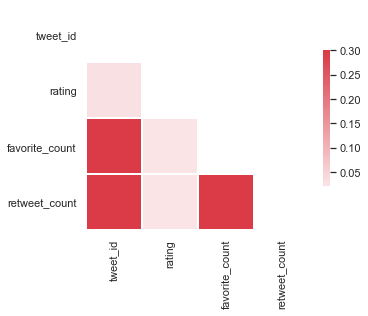

In [160]:
# Correlation Heatmap
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [161]:
# choose the data for analyzing
df_analyze = df[['source','dog_stage','rating','favorite_count','retweet_count']]
df_analyze.head(3)

,source,dog_stage,rating,favorite_count,retweet_count
0,iPhone,None,0.7,121,42
1,iPhone,None,0.9,112,41
2,iPhone,None,0.6,272,132


In [163]:
# Group by "source" 
df_source = df_analyze.groupby('source')
df_source['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
TweetDeck,10.0,18.770000,55.807288,0.9,1.100,1.15,1.200,177.6
Web,28.0,1.017857,0.278958,0.1,0.875,1.10,1.225,1.4
iPhone,1923.0,1.080282,0.972665,0.0,1.000,1.10,1.200,42.0


**Insight 2: Most of tweets come from iPhone and the descriptive data and does not show any evidence about bias based on source given the fact that the sample size of data from web and TweetDeck is too small compared to that from iPhone.**

In [169]:
# Group by "dog_stage"
df_stage = df_analyze.groupby('dog_stage')
df_stage.rating.describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1659.0,1.180581,4.458028,0.0,1.000,1.1,1.2,177.6
doggo,62.0,1.187097,0.147641,0.8,1.100,1.2,1.3,1.4
doggo/floofer,1.0,1.100000,NaN,1.1,1.100,1.1,1.1,1.1
doggo/pupper,8.0,1.100000,0.256348,0.5,1.150,1.2,1.2,1.3
doggo/puppo,1.0,1.300000,NaN,1.3,1.300,1.3,1.3,1.3
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.3
pupper,201.0,1.071642,0.208427,0.3,1.000,1.1,1.2,2.7
puppo,22.0,1.200000,0.130931,0.9,1.125,1.2,1.3,1.4


### Visualizing Data

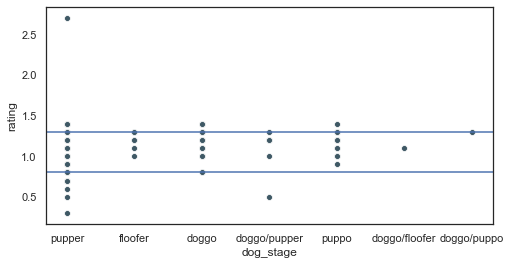

In [195]:
# Plot the rating and the correspondong dog stages data
plt.figure(figsize=(8,4))
plt_stage = sns.scatterplot(x='dog_stage',y='rating', data=df.query('dog_stage != "None"'), color="#3F5965")
plt.axhline(y=np.percentile(df.rating,10));
plt.axhline(y=np.percentile(df.rating,90));

**Insight 3: Regarding the dog stages (if mentioned in the tweet), the ratings of tweets that mention the stages, including pupper, floofer, doggo, puppo, or two of them, distribute in the middle 80% of the whole ratings. This statistic rarely shows the evidence about rating bias based on the dog stages.**

##### The "outliers" in the dataset

In [194]:
df.query('rating >= 25')

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
273,670842764863651840,2015-11-29 05:52:33+00:00,iPhone,After so many requests... here you go.\n\nGood...,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,https://t.co/yfAAo1gdeY,None,None,42.0,23780,8330
1246,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://t.co/GRXwMxLBkh,Atticus,None,177.6,5139,2476


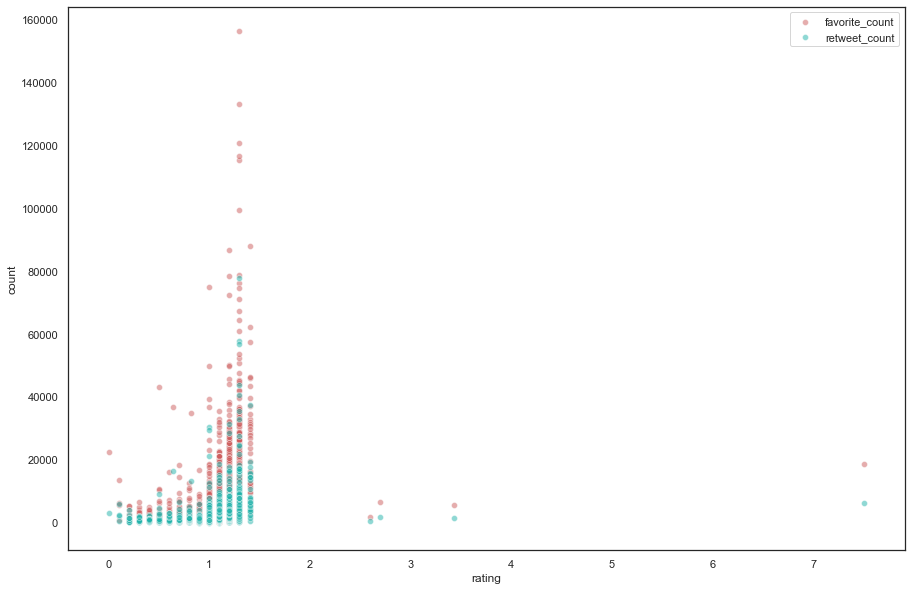

In [126]:
# Plot the rating(<25) and the corresponding favorite and retweet counts
plt.figure(figsize=(15,10))
plt_rating = sns.scatterplot(x='rating', y='favorite_count', data=df.query('rating<25'), color="indianred", alpha=.5);
plt_rating = sns.scatterplot(x='rating', y='retweet_count', data=df.query('rating<25'), color="lightseagreen", alpha=.5);
plt_rating.set(xlabel="rating", ylabel="count");
plt.legend(('favorite_count','retweet_count'))

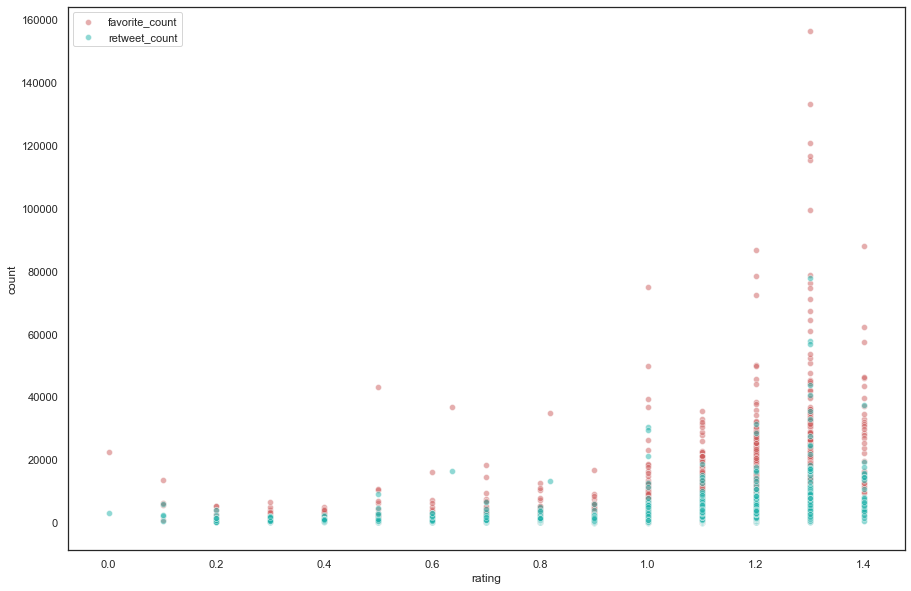

In [196]:
# Plot the rating(<2) and the corresponding favorite and retweet counts 
plt.figure(figsize=(15,10))
plt_rating = sns.scatterplot(x='rating', y='favorite_count', data=df.query('rating<2'), color="indianred", alpha=.5);
plt_rating = sns.scatterplot(x='rating', y='retweet_count', data=df.query('rating<2'), color="lightseagreen", alpha=.5);
plt_rating.set(xlabel="rating", ylabel="count");
plt.legend(('favorite_count','retweet_count'))

**Insight 4: With the rating range from 0 to 1.4, the higher rating tends to gain more “likes”. The relationship between the retweet counts and the rating is not as strong as that between favorite counts and ratings.**

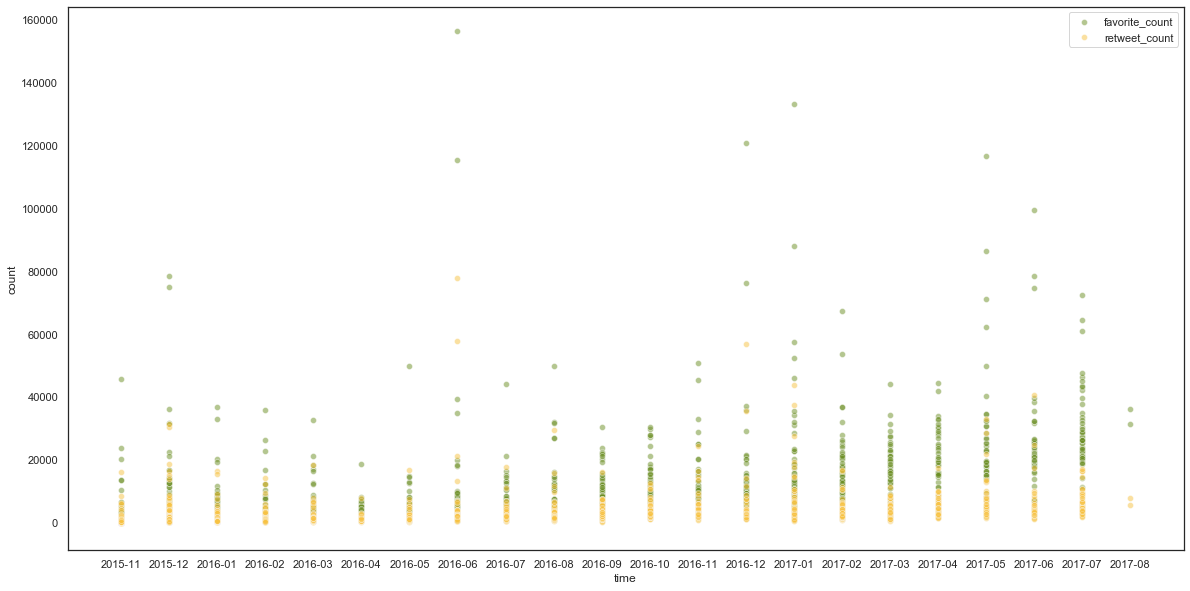

In [130]:
# Plot the time by year and month and the corresponding favorite and retweet counts
df['year_month'] = df['timestamp'].str[:-len('-15 23:05:30+00:00')]
plt.figure(figsize=(20,10))
plt_rating = sns.scatterplot(x='year_month', y='favorite_count', data=df, color="olivedrab", alpha=.5);
plt_rating = sns.scatterplot(x='year_month', y='retweet_count', data=df, color="#F7C242", alpha=.5);
plt_rating.set(xlabel="time", ylabel="count");
plt.legend(('favorite_count','retweet_count'))

**Insight 5: This visualization reiterates the history of this twitter account: in June 2016, it gained its most “likes” count; since then, it gains more and more “likes”; same as the rating records, the time does not seem to be a strong factor leading the retweet counts.**

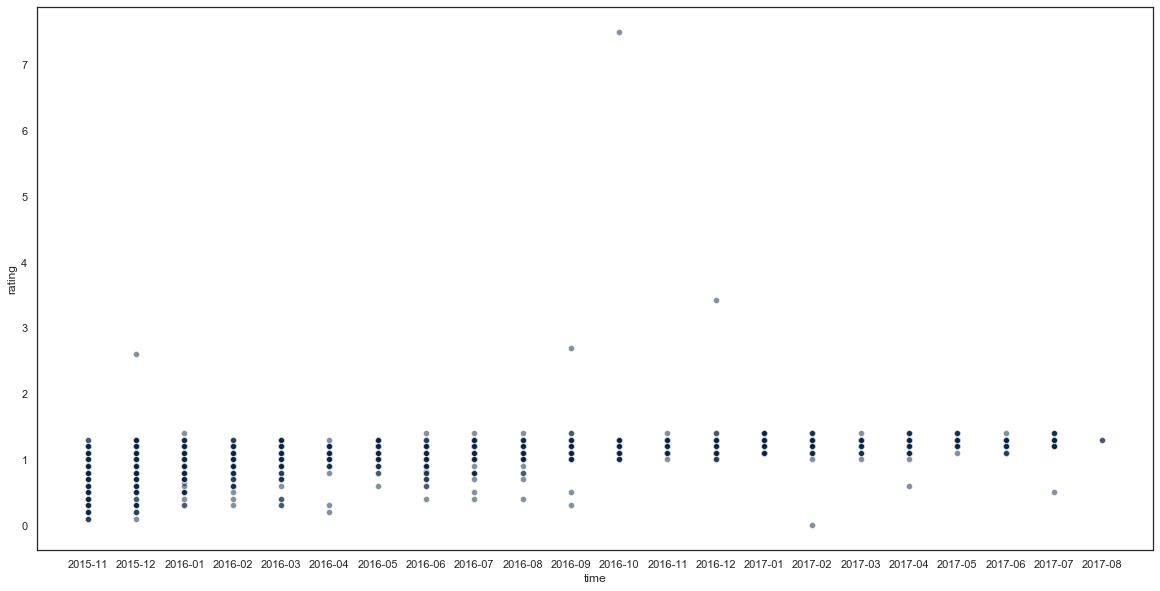

In [143]:
# Plot the time by year and month and the corresponding ratings
plt.figure(figsize=(20,10))
plt_ratedtime = sns.scatterplot(x='year_month', y='rating', data=df.query('rating<25'), color="#072446", alpha=.5);
plt_ratedtime.set(xlabel="time", ylabel="rating");

**Insight 6: as the “rating right” belongs to the owner of the account, I would like to know whether the rating habit has changed with time, so I made another scatterplot which shows clearly that the range of rating was narrowed according to the time.**